# Модели регрессии
Цель работы
Познакомиться с основными приемами работы с моделями регрессии в scikit-learn.

Задания для выполнения
Загрузите встроенные датасет о ценах на недвижимость в Калифорнии.
Постройте модель регрессии для предсказания цены конкретного объекта.
Оцените качество построенной модели с помощью визуализации и коэффициента детерминации.
Постройте альтернативную полиномиальную модель, сравните ее с предыдущей.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [3]:
type(california)

sklearn.utils._bunch.Bunch

In [4]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(type(california.data), type(california.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [6]:
print(california.data.shape, california.target.shape)

(20640, 8) (20640,)


In [7]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [10]:
y = data['Price']
X = data.drop('Price', axis=1)

In [11]:
y.shape, X.shape

((20640,), (20640, 8))

In [12]:
# Приступим к обучению и оценке качества модели. Из набора линейных моделей библиотеки sklearn импортируем линейную регрессию:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [13]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


In [14]:
_ = [print(k, v) for k, v in zip(X.columns, model.coef_)]

MedInc 0.436693293134325
HouseAge 0.00943577803323845
AveRooms -0.10732204139090426
AveBedrms 0.6450656935198124
Population -3.976389421180351e-06
AveOccup -0.0037865426549710595
Latitude -0.421314377527144
Longitude -0.43451375467477726


In [15]:
print("Intercept: \n", model.intercept_)

Intercept: 
 -36.94192020718445


In [16]:
y_pred = model.predict(X)
print(y_pred[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]


In [17]:
y_pred = model.predict(X)
print(y_pred[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]


In [18]:
print(y[:5])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


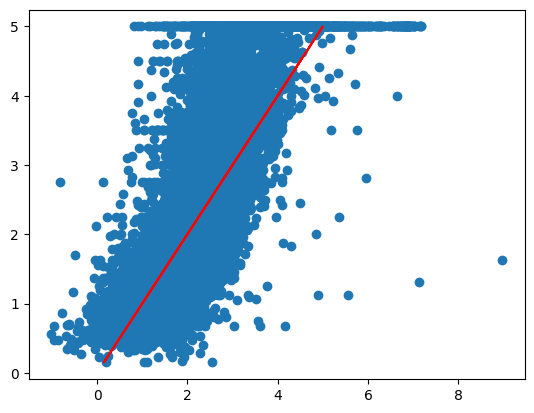

In [19]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5).fit_transform(X)

In [21]:
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

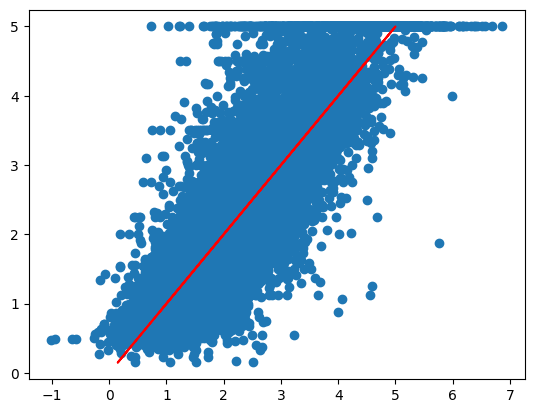

In [23]:
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

In [24]:
polynomial.score(poly, y)

0.7419914151689643

# Контрольные вопросы

1. Чем отличается применение разных моделей регрессии в библиотеке sklearn от моделей классификации?

- Основные отличия:

Целевая переменная:
В регрессии — непрерывная (например, цена недвижимости, вес, рост).
В классификации — дискретная, категории (например, классы, типы, метки).
Метрики качества:
В регрессии — MSE, MAE, RMSE, R2.
В классификации — Accuracy, Precision, Recall, F1-score, ROC-AUC.
Функции потерь:
В регрессии — например, MSE (Mean Squared Error).
В классификации — например, логистическая функция потерь (Log-Loss).
Модели в sklearn:
Для регрессии: LinearRegression, Ridge, Lasso, SVR.
Для классификации: LogisticRegression, SVC, RandomForestClassifier.

2. Что показывает коэффициент детерминации для модели регрессии?

- Коэффициент детерминации измеряет, какая доля вариации целевой переменной объясняется моделью.

3. Какое значение имеют коэффициенты линейной регрессии?

- Коэффициенты линейной регрессии показывают влияние каждого признака на целевую переменную.

4. Какие атрибуты имеет объект линейной регрессии?

- coef_
- intercept_
- n_features_in_
- feature_names_in_ (если был использован DataFrame)
- rank_
- singular_

# Задания для самостоятельного выполнения

Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [ ]:
# Коэффициенты регрессии и свободный член

print("Коэффициенты модели:", model.coef_)
print("Свободный член (intercept):", model.intercept_)


Коэффициенты модели: [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]
Свободный член (intercept): -36.94192020718445


In [26]:
# Среднеквадратичную ошибку (MSE) и среднюю абсолютную ошибку (MAE)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print("MSE:", mse)
print("MAE:", mae)


MSE: 0.5243209861846072
MAE: 0.5311643817546464


In [28]:
# Изменим fit_intercept
# Если False, модель не будет учитывать свободный член.
model_no_intercept = LinearRegression(fit_intercept=False)
model_no_intercept.fit(X, y)
print("Коэффициенты без intercept:", model_no_intercept.coef_)
print("R² без intercept:", model_no_intercept.score(X, y))

Коэффициенты без intercept: [ 5.13515163e-01  1.56511109e-02 -1.82528269e-01  8.65099057e-01
  7.79230657e-06 -4.69928985e-03 -6.39458199e-02 -1.63827177e-02]
R² без intercept: 0.5462360656980104


Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности. Рекомендуется исследовать следующие модели:
Метод опорных векторов
Без ядра
С гауссовым ядром
С полиномиальным ядром
Метод ближайших соседей
Многослойный перцептрон
Дерево решений

SVM (линейное ядро):
MSE = 1.2175, R² = 0.0856

SVM (RBF ядро):
MSE = 0.3326, R² = 0.7502

SVM (полиномиальное ядро):
MSE = 0.7019, R² = 0.4729

Метод ближайших соседей:
MSE = 0.2682, R² = 0.7986

Многослойный перцептрон:
MSE = 0.2179, R² = 0.8364

Дерево решений:
MSE = 0.4906, R² = 0.6316


Сводная таблица результатов:
                      Модель       MSE        R²
0        SVM (линейное ядро)  1.217519  0.085638
1             SVM (RBF ядро)  0.332568  0.750240
2  SVM (полиномиальное ядро)  0.701920  0.472855
3    Метод ближайших соседей  0.268215  0.798569
4    Многослойный перцептрон  0.217905  0.836352
5             Дерево решений  0.490564  0.631584


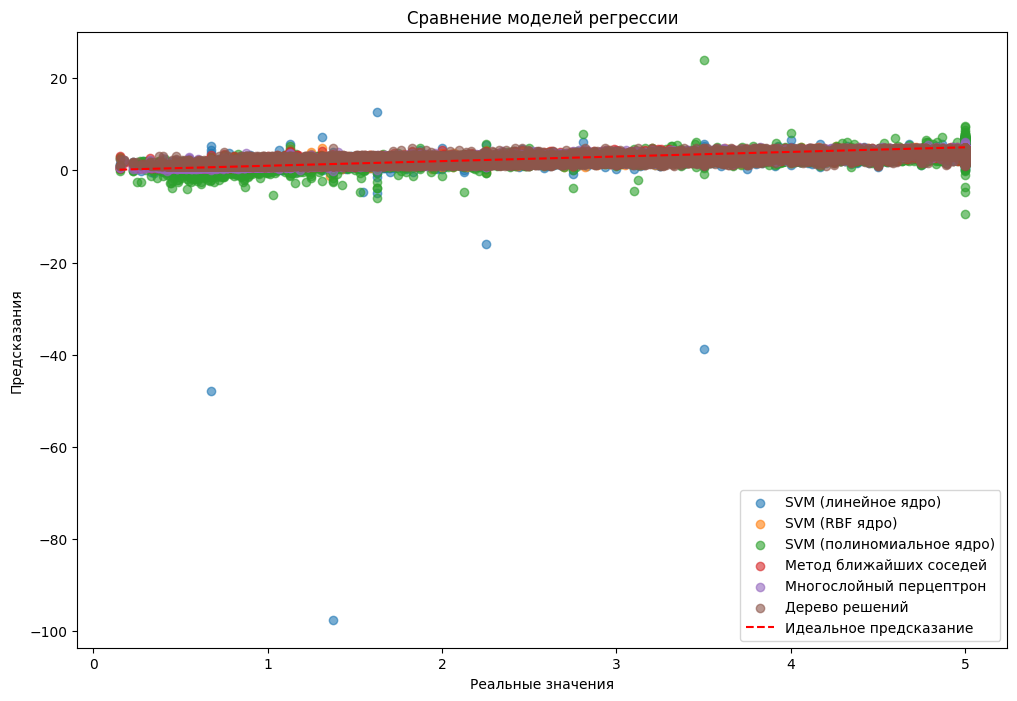

In [33]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Нормализация данных для моделей, требующих нормализованных признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Список моделей
models = {
    "SVM (линейное ядро)": SVR(kernel="linear"),
    "SVM (RBF ядро)": SVR(kernel="rbf"),
    "SVM (полиномиальное ядро)": SVR(kernel="poly", degree=3),
    "Метод ближайших соседей": KNeighborsRegressor(n_neighbors=5),
    "Многослойный перцептрон": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
    "Дерево решений": DecisionTreeRegressor(max_depth=5, random_state=42)
}

# Оценка моделей
results = []

for name, model in models.items():
    # Обучение модели
    model.fit(X_scaled, y)
    # Предсказания
    y_pred = model.predict(X_scaled)
    # Метрики
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    results.append({"Модель": name, "MSE": mse, "R²": r2})
    print(f"{name}:\nMSE = {mse:.4f}, R² = {r2:.4f}\n")

# Построение таблицы результатов
import pandas as pd
results_df = pd.DataFrame(results)
print("\nСводная таблица результатов:")
print(results_df)

# Визуализация предсказаний
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for name, model in models.items():
    y_pred = model.predict(X_scaled)
    plt.scatter(y, y_pred, label=name, alpha=0.6)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Идеальное предсказание")
plt.xlabel("Реальные значения")
plt.ylabel("Предсказания")
plt.legend()
plt.title("Сравнение моделей регрессии")
plt.show()


3. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [ ]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

def evaluate_models(X, y):

    # Нормализация данных
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Список моделей
    models = {
        "SVM (линейное ядро)": SVR(kernel="linear"),
        "SVM (RBF ядро)": SVR(kernel="rbf"),
        "SVM (полиномиальное ядро)": SVR(kernel="poly", degree=3),
        "Метод ближайших соседей": KNeighborsRegressor(n_neighbors=5),
        "Многослойный перцептрон": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
        "Дерево решений": DecisionTreeRegressor(max_depth=5, random_state=42)
    }

    # Оценка моделей
    results = []

    for name, model in models.items():
        # Обучение модели
        model.fit(X_scaled, y)
        # Предсказания
        y_pred = model.predict(X_scaled)
        # Метрики
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        results.append({"Модель": name, "MSE": mse, "R²": r2})

    # Возвращаем результаты в виде DataFrame
    return pd.DataFrame(results)

# Пример использования
results_df = evaluate_models(X, y)
print(results_df)


4. Повторите полностью анализ для другого набора данных - встроенного в sklearn датасета diabetes.

In [34]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Загрузка датасета diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Функция для автоматической оценки моделей
def evaluate_models(X_train, y_train, X_test, y_test):
    # Нормализация данных
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Список моделей
    models = {
        "SVM (линейное ядро)": SVR(kernel="linear"),
        "SVM (RBF ядро)": SVR(kernel="rbf"),
        "SVM (полиномиальное ядро)": SVR(kernel="poly", degree=3),
        "Метод ближайших соседей": KNeighborsRegressor(n_neighbors=5),
        "Многослойный перцептрон": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
        "Дерево решений": DecisionTreeRegressor(max_depth=5, random_state=42)
    }

    # Оценка моделей
    results = []

    for name, model in models.items():
        # Обучение модели
        model.fit(X_train_scaled, y_train)
        # Предсказания
        y_pred = model.predict(X_test_scaled)
        # Метрики
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append({"Модель": name, "MSE": mse, "R²": r2})

    # Возвращаем результаты в виде DataFrame
    return pd.DataFrame(results)

# Выполнение анализа
results_diabetes = evaluate_models(X_train, y_train, X_test, y_test)
print("\nРезультаты анализа для датасета Diabetes:")
print(results_diabetes)



Результаты анализа для датасета Diabetes:
                      Модель          MSE        R²
0        SVM (линейное ядро)  2939.812780  0.445125
1             SVM (RBF ядро)  4332.738479  0.182217
2  SVM (полиномиальное ядро)  3801.507200  0.282484
3    Метод ближайших соседей  3047.449888  0.424809
4    Многослойный перцептрон  2699.028146  0.490572
5             Дерево решений  3526.015512  0.334482


c:\Users\alesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
